## Transfer Learning Inception V3 using Keras

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [4]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/DM_AP/dataset/train'
valid_path = '/content/drive/MyDrive/DM_AP/dataset/test'


In [5]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




87924736/87910968 [==============================] - 1s 0us/step


In [6]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [7]:
 # useful for getting number of output classes
folders = glob("/content/drive/MyDrive/DM_AP/dataset/train/*")

In [8]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [9]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [10]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [11]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [12]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [13]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/DM_AP/dataset/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1952 images belonging to 4 classes.


In [14]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/DM_AP/dataset/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/20
61/61 [==============================] - 610s 10s/step - loss: 2.4369 - accuracy: 0.7480 - val_loss: 1.1464 - val_accuracy: 0.8333
Epoch 2/20
61/61 [==============================] - 205s 3s/step - loss: 0.6843 - accuracy: 0.8755 - val_loss: 0.0848 - val_accuracy: 0.8889
Epoch 3/20
61/61 [==============================] - 204s 3s/step - loss: 0.6600 - accuracy: 0.8873 - val_loss: 0.4950 - val_accuracy: 0.8889
Epoch 4/20
61/61 [==============================] - 205s 3s/step - loss: 0.5819 - accuracy: 0.9196 - val_loss: 0.1907 - val_accuracy: 0.9444
Epoch 5/20
61/61 [==============================] - 205s 3s/step - loss: 0.5148 - accuracy: 0.9221 - val_loss: 0.0021 - val_accuracy: 1.0000
Epoch 6/20
61/61 [==============================] - 205s 3s/step - loss: 0.5498 - accuracy: 0.9196 - val_loss: 0.0049 - val_accuracy: 1.0000
Epoch 7/20
61/61 [==============================] - 205s 3s/step - loss: 0.4334 - accuracy: 0.9385 - val_loss: 0.0154 - val_accuracy: 1.0000
Epoch 8/20
6

In [17]:
import matplotlib.pyplot as plt

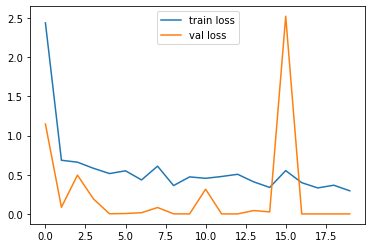

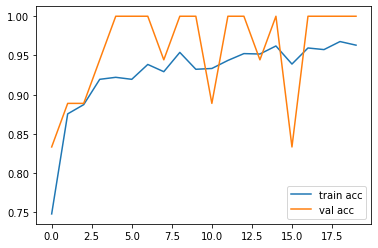

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/DM_AP/model_inception.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([1, 0, 1, 3, 3, 1, 0, 2, 1, 3, 2, 0, 1, 3, 3, 2, 2, 2])

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('/content/drive/MyDrive/DM_AP/model_inception.h5')

In [38]:
img=image.load_img('/content/drive/MyDrive/DM_AP/dataset/val/fresh cotton plant/dsd (168)_iaip.jpg',target_size=(224,224))



In [39]:
x=image.img_to_array(img)
x

array([[[ 94., 157.,  52.],
        [ 94., 157.,  52.],
        [ 94., 157.,  52.],
        ...,
        [ 41.,  85.,  24.],
        [ 42.,  86.,  25.],
        [ 38.,  82.,  21.]],

       [[ 94., 157.,  52.],
        [ 94., 157.,  52.],
        [ 94., 157.,  52.],
        ...,
        [ 41.,  85.,  24.],
        [ 42.,  86.,  25.],
        [ 38.,  82.,  21.]],

       [[ 94., 157.,  52.],
        [ 94., 157.,  52.],
        [ 94., 157.,  52.],
        ...,
        [ 41.,  85.,  24.],
        [ 42.,  86.,  25.],
        [ 38.,  82.,  21.]],

       ...,

       [[ 39.,  90.,  13.],
        [ 39.,  90.,  13.],
        [ 42.,  93.,  16.],
        ...,
        [121., 165.,  52.],
        [108., 152.,  39.],
        [107., 151.,  38.]],

       [[ 38.,  89.,  12.],
        [ 37.,  88.,  11.],
        [ 41.,  92.,  15.],
        ...,
        [117., 161.,  48.],
        [112., 156.,  43.],
        [111., 155.,  42.]],

       [[ 36.,  87.,  10.],
        [ 36.,  87.,  10.],
        [ 39.,  

In [40]:
x.shape

(224, 224, 3)

In [41]:
x=x/255

In [42]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [43]:
model.predict(img_data)

array([[0.37437025, 0.25019658, 0.12006894, 0.25536418]], dtype=float32)

In [44]:
a=np.argmax(model.predict(img_data), axis=1)

In [47]:
a==0

array([ True])